
🌍 SDG 3: MATERNAL HEALTH RISK PREDICTION SYSTEM 🤰
Using Machine Learning to Improve Maternal Healthcare

MATERNAL HEALTH RISK PREDICTION - SDG 3

Dataset Overview:
   Age  SystolicBP  DiastolicBP         BS   BodyTemp  HeartRate  RiskLevel
0   24         152           63   7.152862  38.983138         94  high risk
1   37         106           76   9.044408  36.612278         65   low risk
2   46         162           94  14.352753  38.402520         64  high risk
3   32         122           72   8.021541  37.429310         81   low risk
4   28         173          100   9.349503  37.481145         82  high risk

Dataset Shape: (1000, 7)

Feature Statistics:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     34.066000   133.770000    84.020000    10.491681    37.742838   
std       9.575664    26.003948    14.463706     2.600384     0.715451   
min      18.000000    90.000000    6

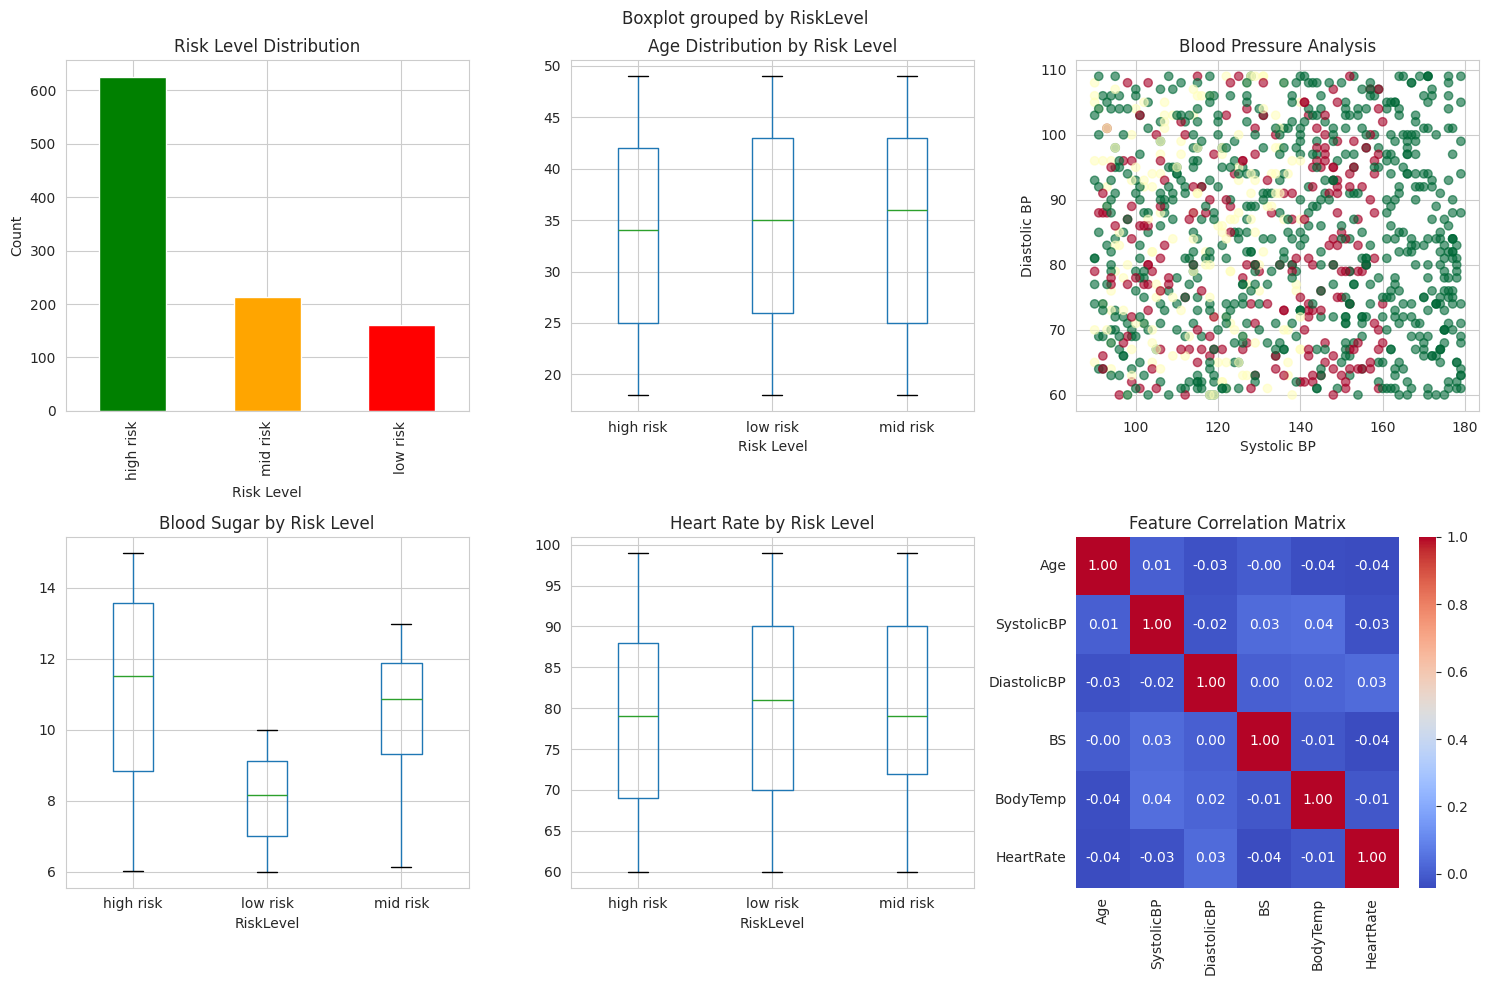


DATA PREPROCESSING

Encoded Risk Levels: {'high risk': 0, 'low risk': 1, 'mid risk': 2}
Training set size: 800 samples
Test set size: 200 samples

MODEL TRAINING

Training Random Forest Classifier...
✓ Model training complete!

Feature Importance:
       feature  importance
3           BS    0.380060
4     BodyTemp    0.292001
1   SystolicBP    0.263958
5    HeartRate    0.025385
2  DiastolicBP    0.021828
0          Age    0.016768

MODEL EVALUATION

Model Accuracy: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

   high risk       1.00      1.00      1.00       125
    low risk       1.00      1.00      1.00        32
    mid risk       1.00      1.00      1.00        43

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


✓ Confusion matrix saved as 'confusion_matrix.png'


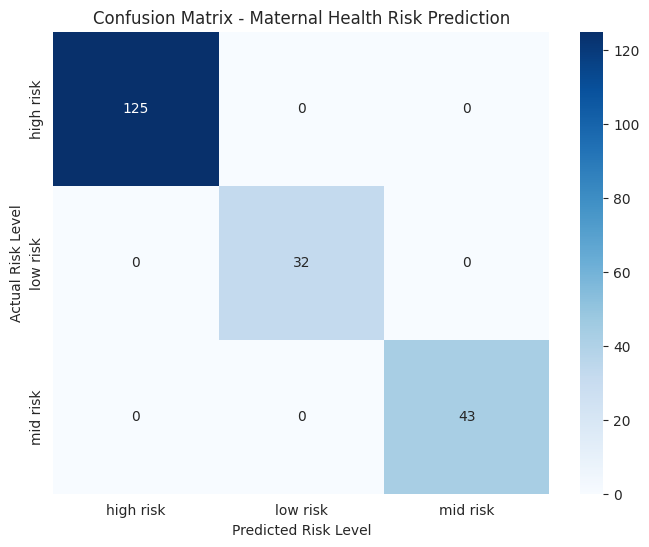


EXAMPLE PREDICTIONS

Case 1: High-Risk Patient

INDIVIDUAL RISK PREDICTION

Patient Information:
  Age: 35 years
  Blood Pressure: 170/100 mmHg
  Blood Sugar: 14.0 mmol/L
  Body Temperature: 38.5°C
  Heart Rate: 90 bpm

Predicted Risk Level: HIGH RISK

Prediction Confidence:
  high risk: 100.00%
  low risk: 0.00%
  mid risk: 0.00%

Case 2: Low-Risk Patient

INDIVIDUAL RISK PREDICTION

Patient Information:
  Age: 28 years
  Blood Pressure: 110/70 mmHg
  Blood Sugar: 7.5 mmol/L
  Body Temperature: 37.0°C
  Heart Rate: 75 bpm

Predicted Risk Level: LOW RISK

Prediction Confidence:
  high risk: 2.53%
  low risk: 96.23%
  mid risk: 1.25%

ETHICAL CONSIDERATIONS

    1. BIAS MITIGATION:
       - Ensure training data represents diverse populations
       - Monitor for age, geographic, and socioeconomic biases
       - Regular model audits for fairness across groups
    
    2. HUMAN-IN-THE-LOOP:
       - Predictions are decision support, not replacements for doctors
       - Healthcare profe

In [1]:
# Maternal Health Risk Prediction - SDG 3: Good Health and Well-being
# Author: PLP Academy Student
# Date: October 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

class MaternalHealthPredictor:
    """
    ML Model to predict maternal health risk levels based on health indicators.
    Addresses SDG 3: Good Health and Well-being
    """

    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.feature_names = None

    def load_and_explore_data(self, filepath=None):
        """
        Load maternal health dataset and perform exploratory data analysis.
        Dataset features: Age, SystolicBP, DiastolicBP, BS (Blood Sugar),
        BodyTemp, HeartRate, RiskLevel
        """
        # For demonstration, create synthetic data similar to UCI Maternal Health Risk dataset
        # In real project, load from: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk

        if filepath:
            df = pd.read_csv(filepath)
        else:
            # Generate synthetic data for demonstration
            np.random.seed(42)
            n_samples = 1000

            df = pd.DataFrame({
                'Age': np.random.randint(18, 50, n_samples),
                'SystolicBP': np.random.randint(90, 180, n_samples),
                'DiastolicBP': np.random.randint(60, 110, n_samples),
                'BS': np.random.uniform(6.0, 15.0, n_samples),
                'BodyTemp': np.random.uniform(36.5, 39.0, n_samples),
                'HeartRate': np.random.randint(60, 100, n_samples)
            })

            # Create risk levels based on health indicators
            df['RiskLevel'] = 'low risk'
            df.loc[(df['SystolicBP'] > 140) | (df['BS'] > 10), 'RiskLevel'] = 'mid risk'
            df.loc[(df['SystolicBP'] > 160) | (df['BS'] > 13) | (df['BodyTemp'] > 38), 'RiskLevel'] = 'high risk'

        print("=" * 60)
        print("MATERNAL HEALTH RISK PREDICTION - SDG 3")
        print("=" * 60)
        print("\nDataset Overview:")
        print(df.head())
        print(f"\nDataset Shape: {df.shape}")
        print("\nFeature Statistics:")
        print(df.describe())
        print("\nRisk Level Distribution:")
        print(df['RiskLevel'].value_counts())
        print("\nMissing Values:")
        print(df.isnull().sum())

        return df

    def visualize_data(self, df):
        """Create visualizations for exploratory data analysis"""
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle('Maternal Health Risk Analysis - SDG 3', fontsize=16, fontweight='bold')

        # Risk level distribution
        df['RiskLevel'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['green', 'orange', 'red'])
        axes[0, 0].set_title('Risk Level Distribution')
        axes[0, 0].set_xlabel('Risk Level')
        axes[0, 0].set_ylabel('Count')

        # Age distribution by risk level
        df.boxplot(column='Age', by='RiskLevel', ax=axes[0, 1])
        axes[0, 1].set_title('Age Distribution by Risk Level')
        axes[0, 1].set_xlabel('Risk Level')

        # Blood Pressure Analysis
        axes[0, 2].scatter(df['SystolicBP'], df['DiastolicBP'],
                          c=self.label_encoder.fit_transform(df['RiskLevel']),
                          cmap='RdYlGn_r', alpha=0.6)
        axes[0, 2].set_title('Blood Pressure Analysis')
        axes[0, 2].set_xlabel('Systolic BP')
        axes[0, 2].set_ylabel('Diastolic BP')

        # Blood Sugar levels
        df.boxplot(column='BS', by='RiskLevel', ax=axes[1, 0])
        axes[1, 0].set_title('Blood Sugar by Risk Level')

        # Heart Rate distribution
        df.boxplot(column='HeartRate', by='RiskLevel', ax=axes[1, 1])
        axes[1, 1].set_title('Heart Rate by Risk Level')

        # Correlation heatmap
        numeric_df = df.select_dtypes(include=[np.number])
        sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', ax=axes[1, 2], cmap='coolwarm')
        axes[1, 2].set_title('Feature Correlation Matrix')

        plt.tight_layout()
        plt.savefig('maternal_health_eda.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualizations saved as 'maternal_health_eda.png'")
        plt.show()

    def preprocess_data(self, df):
        """Preprocess data: encoding, scaling, splitting"""
        print("\n" + "=" * 60)
        print("DATA PREPROCESSING")
        print("=" * 60)

        # Separate features and target
        X = df.drop('RiskLevel', axis=1)
        y = df['RiskLevel']

        self.feature_names = X.columns.tolist()

        # Encode target labels
        y_encoded = self.label_encoder.fit_transform(y)
        print(f"\nEncoded Risk Levels: {dict(zip(self.label_encoder.classes_, range(len(self.label_encoder.classes_))))}")

        # Split data (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        print(f"Training set size: {X_train.shape[0]} samples")
        print(f"Test set size: {X_test.shape[0]} samples")

        return X_train_scaled, X_test_scaled, y_train, y_test

    def train_model(self, X_train, y_train):
        """Train Random Forest Classifier"""
        print("\n" + "=" * 60)
        print("MODEL TRAINING")
        print("=" * 60)

        # Train Random Forest (best for tabular health data)
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42,
            class_weight='balanced'  # Handle imbalanced classes
        )

        print("\nTraining Random Forest Classifier...")
        self.model.fit(X_train, y_train)
        print("✓ Model training complete!")

        # Feature importance
        feature_importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)

        print("\nFeature Importance:")
        print(feature_importance)

        return feature_importance

    def evaluate_model(self, X_test, y_test):
        """Evaluate model performance"""
        print("\n" + "=" * 60)
        print("MODEL EVALUATION")
        print("=" * 60)

        # Make predictions
        y_pred = self.model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nModel Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred,
                                   target_names=self.label_encoder.classes_))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.label_encoder.classes_,
                   yticklabels=self.label_encoder.classes_)
        plt.title('Confusion Matrix - Maternal Health Risk Prediction')
        plt.ylabel('Actual Risk Level')
        plt.xlabel('Predicted Risk Level')
        plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
        print("\n✓ Confusion matrix saved as 'confusion_matrix.png'")
        plt.show()

        return accuracy

    def predict_risk(self, age, systolic_bp, diastolic_bp, blood_sugar, body_temp, heart_rate):
        """Predict risk level for a new patient"""
        # Create input array
        input_data = np.array([[age, systolic_bp, diastolic_bp, blood_sugar, body_temp, heart_rate]])

        # Scale input
        input_scaled = self.scaler.transform(input_data)

        # Predict
        prediction = self.model.predict(input_scaled)
        risk_level = self.label_encoder.inverse_transform(prediction)[0]

        # Get prediction probabilities
        probabilities = self.model.predict_proba(input_scaled)[0]

        print("\n" + "=" * 60)
        print("INDIVIDUAL RISK PREDICTION")
        print("=" * 60)
        print(f"\nPatient Information:")
        print(f"  Age: {age} years")
        print(f"  Blood Pressure: {systolic_bp}/{diastolic_bp} mmHg")
        print(f"  Blood Sugar: {blood_sugar} mmol/L")
        print(f"  Body Temperature: {body_temp}°C")
        print(f"  Heart Rate: {heart_rate} bpm")
        print(f"\nPredicted Risk Level: {risk_level.upper()}")
        print(f"\nPrediction Confidence:")
        for idx, prob in enumerate(probabilities):
            print(f"  {self.label_encoder.classes_[idx]}: {prob*100:.2f}%")

        return risk_level, probabilities

def main():
    """Main execution function"""
    print("\n🌍 SDG 3: MATERNAL HEALTH RISK PREDICTION SYSTEM 🤰")
    print("Using Machine Learning to Improve Maternal Healthcare\n")

    # Initialize predictor
    predictor = MaternalHealthPredictor()

    # Load and explore data
    df = predictor.load_and_explore_data()

    # Visualize data
    predictor.visualize_data(df)

    # Preprocess data
    X_train, X_test, y_train, y_test = predictor.preprocess_data(df)

    # Train model
    feature_importance = predictor.train_model(X_train, y_train)

    # Evaluate model
    accuracy = predictor.evaluate_model(X_test, y_test)

    # Example predictions
    print("\n" + "=" * 60)
    print("EXAMPLE PREDICTIONS")
    print("=" * 60)

    # High risk case
    print("\nCase 1: High-Risk Patient")
    predictor.predict_risk(age=35, systolic_bp=170, diastolic_bp=100,
                          blood_sugar=14.0, body_temp=38.5, heart_rate=90)

    # Low risk case
    print("\nCase 2: Low-Risk Patient")
    predictor.predict_risk(age=28, systolic_bp=110, diastolic_bp=70,
                          blood_sugar=7.5, body_temp=37.0, heart_rate=75)

    print("\n" + "=" * 60)
    print("ETHICAL CONSIDERATIONS")
    print("=" * 60)
    print("""
    1. BIAS MITIGATION:
       - Ensure training data represents diverse populations
       - Monitor for age, geographic, and socioeconomic biases
       - Regular model audits for fairness across groups

    2. HUMAN-IN-THE-LOOP:
       - Predictions are decision support, not replacements for doctors
       - Healthcare professionals must validate all risk assessments

    3. DATA PRIVACY:
       - Implement HIPAA-compliant data handling
       - Anonymize patient data
       - Secure storage and transmission protocols

    4. ACCESSIBILITY:
       - Deploy in resource-limited settings
       - Provide multilingual support
       - Ensure affordability and scalability

    5. TRANSPARENCY:
       - Explainable AI techniques (feature importance)
       - Clear communication of model limitations
       - Regular performance monitoring
    """)

    print("\n✓ Project Complete! Check generated visualizations.")
    print("📊 Files created: maternal_health_eda.png, confusion_matrix.png")

if __name__ == "__main__":
    main()